In [1]:
from Helper_modules import denoiser, helper_func, import_img, noise
import csv
from itertools import product
import numpy as np
import os

In [2]:
base_dir = os.getcwd()  # Current working directory

In [34]:
image_path = f"{base_dir}/Dataset/train/003_img.png"
image = import_img.load_and_normalize_image(image_path)

In [4]:
gaussian_noisy_image = noise.add_gaussian_noise(image)
salt_und_pepper_noisy_image = noise.add_salt_and_pepper_noise(image)
poisson_noisy_image = noise.add_poisson_noise(image)
speckle_noisy_image = noise.add_speckle_noise(image)

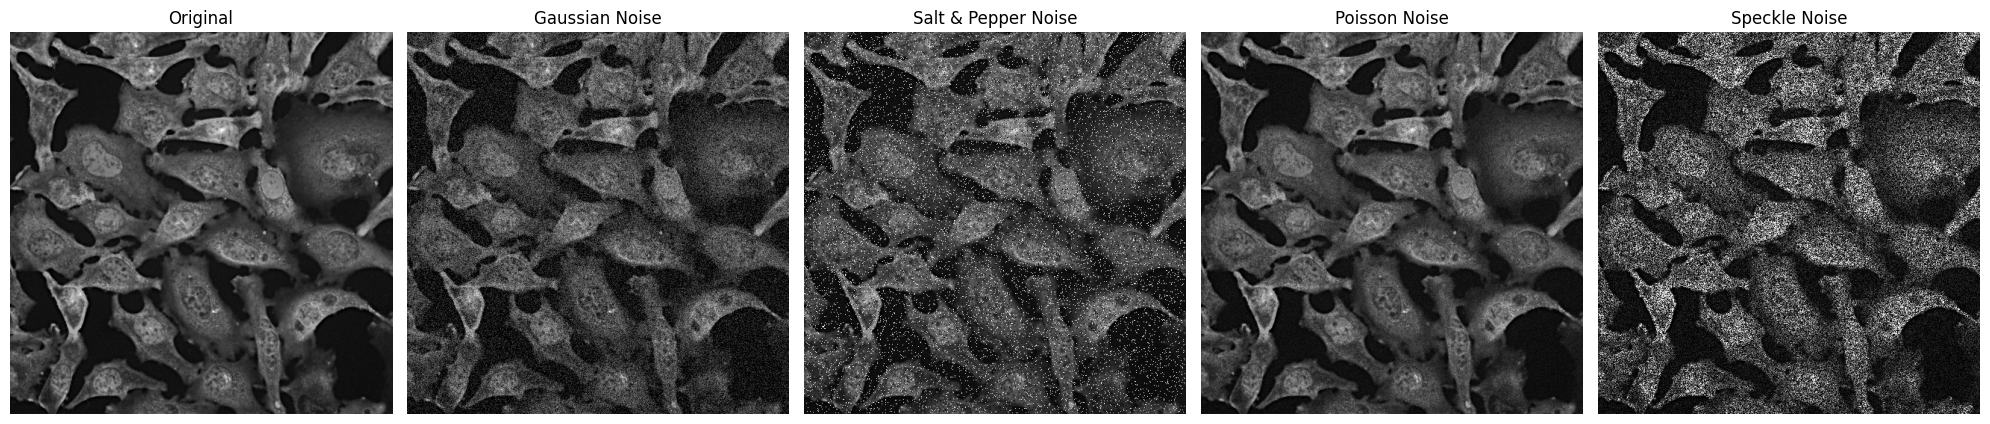

In [5]:
helper_func.plot_noisy_images(image, gaussian_noisy_image, salt_und_pepper_noisy_image, poisson_noisy_image, speckle_noisy_image)

In [6]:
noisy_image = speckle_noisy_image
denoiser = denoiser.ImageDenoiser(image, noisy_image=noisy_image)

In [7]:
denoised_gaussian = denoiser.denoise_with_gaussian_blur(kernel_size=(3,3), sigmaX=10)

In [8]:
float(helper_func.calculate_psnr(image, denoised_gaussian))


22.601500977771558

Best PSNR: 25.50 dB
Best Parameters: kernel_size=(7, 7), sigmaX=10


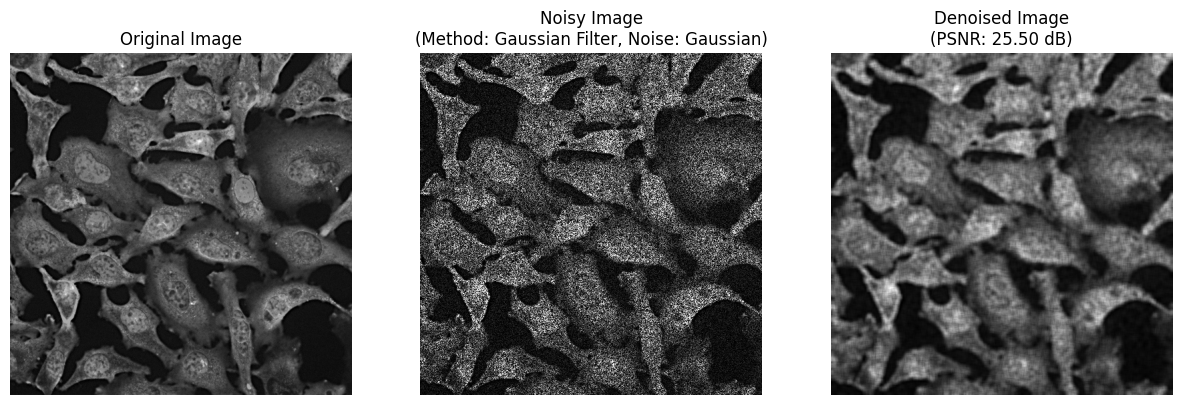

In [9]:
def evaluate_gaussian_denoising(kernel_size, sigmaX):
    # Apply the Gaussian filter with the given hyperparameters
    denoised_image = denoiser.denoise_with_gaussian_blur(
        kernel_size=kernel_size,
        sigmaX=sigmaX
    )
    
    # Calculate PSNR as the performance metric
    psnr_value = helper_func.calculate_psnr(denoised_image, image)  # Adjust original_image as needed
    return psnr_value

# Define ranges for hyperparameters
kernel_sizes = [(size, size) for size in range(3, 10, 2)]  # Generates [(3, 3), (5, 5), (7, 7), (9, 9)]
sigmaX_values = list(range(10, 101, 10))  # Generates [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

best_psnr = -np.inf
best_params = None

# Open a CSV file to write PSNR values
with open('Results/numbers/gaussian_gaussian_psnr_results.csv', 'w', newline='') as csvfile:
    # Create a CSV writer object
    csvwriter = csv.writer(csvfile)
    
    # Write header
    csvwriter.writerow(["Kernel Size", "SigmaX", "PSNR"])
    
    # Generate combinations of all hyperparameters using itertools.product
    for kernel_size, sigmaX in product(kernel_sizes, sigmaX_values):
        psnr_value = evaluate_gaussian_denoising(kernel_size, sigmaX)
        
        # Write the current configuration and PSNR to the file
        csvwriter.writerow([kernel_size, sigmaX, psnr_value])
        
        # Update best PSNR and parameters
        if psnr_value > best_psnr:
            best_psnr = psnr_value
            best_params = (kernel_size, sigmaX)

# Output the best PSNR and parameters
print(f"Best PSNR: {best_psnr:.2f} dB")
print(f"Best Parameters: kernel_size={best_params[0]}, sigmaX={best_params[1]}")

# Use the best parameters to denoise the image
kernel_size = best_params[0]
sigmaX = best_params[1]
method_name = "Gaussian Filter"
noise_type = "Gaussian"

# Denoise the image with the best parameters
denoised_gaussian = denoiser.denoise_with_gaussian_blur(kernel_size=kernel_size, sigmaX=sigmaX)

# Plot the images
helper_func.plot_images(original=image, noisy=noisy_image, denoised_image=denoised_gaussian, method_name=method_name, noise_type=noise_type)


Best PSNR: 22.72 dB
Best Parameters: d=11, sigma_color=125, sigma_space=25


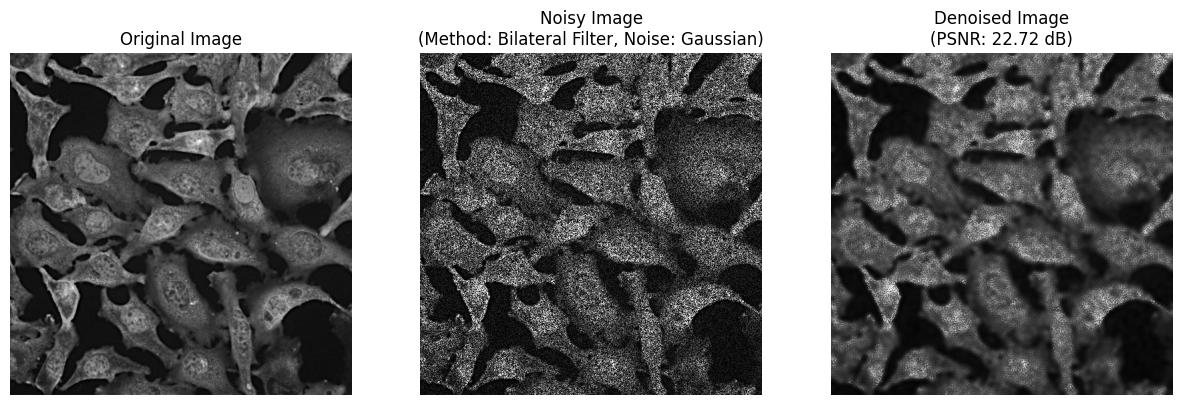

In [10]:
def evaluate_bilateral_denoising(d, sigma_color, sigma_space):
    # Apply the Bilateral filter with the given hyperparameters
    denoised_image = denoiser.denoise_with_bilateral_filter(
        d=d,
        sigma_color=sigma_color,
        sigma_space=sigma_space
    )
    
    # Calculate PSNR as the performance metric
    psnr_value = helper_func.calculate_psnr(denoised_image, image)  # Adjust original_image as needed
    return psnr_value

# Define ranges for hyperparameters
d_values = [3, 5, 7, 9, 11]
sigma_color_values = [25, 50, 75, 100, 125]
sigma_space_values = [25, 50, 75, 100, 125]

best_psnr = -np.inf
best_params = None

# Open a CSV file to write PSNR values
with open('Results/numbers/bilateral_psnr_results.csv', 'w', newline='') as csvfile:
    # Create a CSV writer object
    csvwriter = csv.writer(csvfile)
    
    # Write header
    csvwriter.writerow(["D", "Sigma Color", "Sigma Space", "PSNR"])
    
    # Perform grid search
    for d, sigma_color, sigma_space in product(d_values, sigma_color_values, sigma_space_values):
        psnr_value = evaluate_bilateral_denoising(d, sigma_color, sigma_space)
        
        # Write the current configuration and PSNR to the file
        csvwriter.writerow([d, sigma_color, sigma_space, psnr_value])
        
        # Update best PSNR and parameters
        if psnr_value > best_psnr:
            best_psnr = psnr_value
            best_params = (d, sigma_color, sigma_space)

# Output the best PSNR and parameters
print(f"Best PSNR: {best_psnr:.2f} dB")
print(f"Best Parameters: d={best_params[0]}, sigma_color={best_params[1]}, sigma_space={best_params[2]}")

# Use the best parameters to denoise the image
d = best_params[0]
sigma_color = best_params[1]
sigma_space = best_params[2]
method_name = "Bilateral Filter"
noise_type = "Gaussian"

# Denoise the image with the best parameters
denoised_bilateral = denoiser.denoise_with_bilateral_filter(d=d, sigma_color=sigma_color, sigma_space=sigma_space)

# Plot the images
helper_func.plot_images(original=image, noisy=noisy_image, denoised_image=denoised_bilateral, method_name=method_name, noise_type=noise_type)


Best PSNR: 25.63 dB
Best Parameters: h=90, templateWindowSize=11, searchWindowSize=7


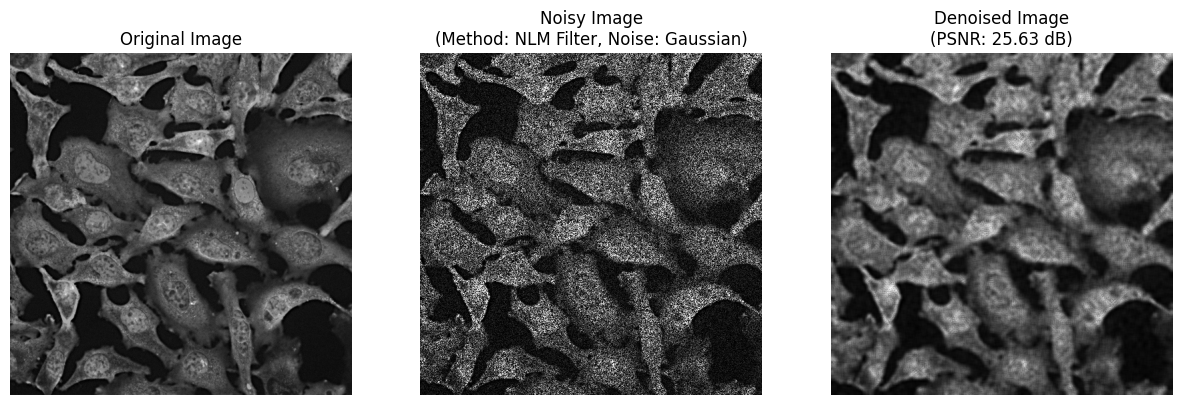

In [11]:
import numpy as np
import csv
from itertools import product

def evaluate_denoising(h, templateWindowSize, searchWindowSize):
    # Apply the NLM filter with the given hyperparameters
    denoised_image = denoiser.denoise_with_nonlocal_means(
        h=h,
        templateWindowSize=templateWindowSize,
        searchWindowSize=searchWindowSize
    )
    
    # Calculate PSNR as the performance metric
    psnr_value = helper_func.calculate_psnr(denoised_image, image)  # Adjust original_image as needed
    return psnr_value

# Define ranges for hyperparameters
h_values = list(range(10, 100, 10))  # Generates [10, 20, 30, ..., 90]
template_window_sizes = list(range(5, 21, 2))  # Generates [5, 7, 9, ..., 19]
search_window_sizes = list(range(5, 11, 2))  # Generates [5, 7, 9]

best_psnr = -np.inf
best_params = None

# Open a CSV file to write PSNR values
with open('Results/numbers/nlm_psnr_results.csv', 'w', newline='') as csvfile:
    # Create a CSV writer object
    csvwriter = csv.writer(csvfile)
    
    # Write header
    csvwriter.writerow(["h", "Template Window Size", "Search Window Size", "PSNR"])
    
    # Generate combinations of all hyperparameters using itertools.product
    for h, templateWindowSize, searchWindowSize in product(h_values, template_window_sizes, search_window_sizes):
        psnr_value = evaluate_denoising(h, templateWindowSize, searchWindowSize)
        
        # Write the current configuration and PSNR to the file
        csvwriter.writerow([h, templateWindowSize, searchWindowSize, psnr_value])
        
        # Update best PSNR and parameters
        if psnr_value > best_psnr:
            best_psnr = psnr_value
            best_params = (h, templateWindowSize, searchWindowSize)

# Output the best PSNR and parameters
print(f"Best PSNR: {best_psnr:.2f} dB")
print(f"Best Parameters: h={best_params[0]}, templateWindowSize={best_params[1]}, searchWindowSize={best_params[2]}")

# Use the best parameters to denoise the image
h = best_params[0]
templateWindowSize = best_params[1]
searchWindowSize = best_params[2]
method_name = "NLM Filter"
noise_type = "Gaussian"

# Denoise the image with the best parameters
denoised_nonlocal_means = denoiser.denoise_with_nonlocal_means(h=h, templateWindowSize=templateWindowSize, searchWindowSize=searchWindowSize)

# Plot the images
helper_func.plot_images(original=image, noisy=noisy_image, denoised_image=denoised_nonlocal_means, method_name=method_name, noise_type=noise_type)


In [12]:
import bm3d

30 10 0.23 5
21.3269756518819
Best PSNR: 21.33 dB
Best Parameters: patch_size=30, stride=10, threshold=0.23, similarity_threshold=5


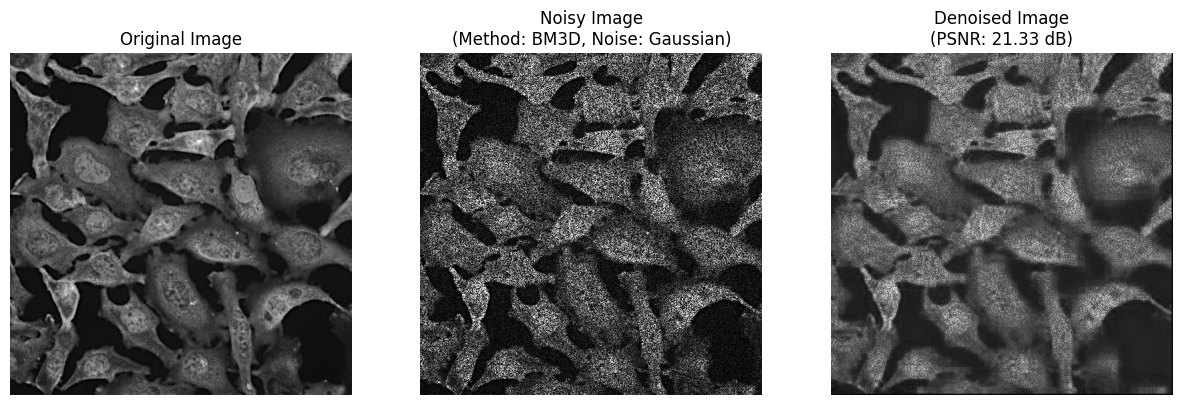

In [41]:
# Define an evaluation function for BM3D
def evaluate_bm3d_denoising(patch_size, stride, threshold, similarity_threshold):
    denoised_image = denoiser.denoise_with_bm3d(
        patch_size=patch_size,
        stride=stride,
        threshold=threshold,
        similarity_threshold=similarity_threshold
    )
    psnr_value = helper_func.calculate_psnr(denoised_image, image)
    return psnr_value

# Define ranges for the hyperparameters
patch_sizes = [30]
strides = [10]
thresholds = [0.23]
similarity_thresholds = [5]


best_psnr = -np.inf
best_params = None

# Write PSNR values to a CSV file
with open('Results/numbers/bm3d_psnr_results.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(["Patch Size", "Stride", "Threshold", "Similarity Threshold", "PSNR"])
    
    # Perform grid search over all combinations
    for patch_size, stride, threshold, similarity_threshold in product(patch_sizes, strides, thresholds, similarity_thresholds):
        psnr_value = evaluate_bm3d_denoising(patch_size, stride, threshold, similarity_threshold)
        print(patch_size, stride, threshold, similarity_threshold)
        # Write the current configuration and PSNR to the file
        csvwriter.writerow([patch_size, stride, threshold, similarity_threshold, psnr_value])
        
        # Update the best PSNR and parameters
        if psnr_value > best_psnr:
            best_psnr = psnr_value
            best_params = (patch_size, stride, threshold, similarity_threshold)
        print(psnr_value)
# Output the best PSNR and parameters
print(f"Best PSNR: {best_psnr:.2f} dB")
print(f"Best Parameters: patch_size={best_params[0]}, stride={best_params[1]}, threshold={best_params[2]}, similarity_threshold={best_params[3]}")

# Use the best parameters to denoise the image
patch_size = best_params[0]
stride = best_params[1]
threshold = best_params[2]
similarity_threshold = best_params[3]
method_name = "BM3D"
noise_type = "Gaussian"

# Apply BM3D with the best parameters
denoised_bm3d = denoiser.denoise_with_bm3d(
    patch_size=patch_size, stride=stride, threshold=threshold, similarity_threshold=similarity_threshold
)

# Plot the images
helper_func.plot_images(original=image, noisy=noisy_image, denoised_image=denoised_bm3d, method_name=method_name, noise_type=noise_type)


0.25
25.794980801297655
Best PSNR: 25.79 dB


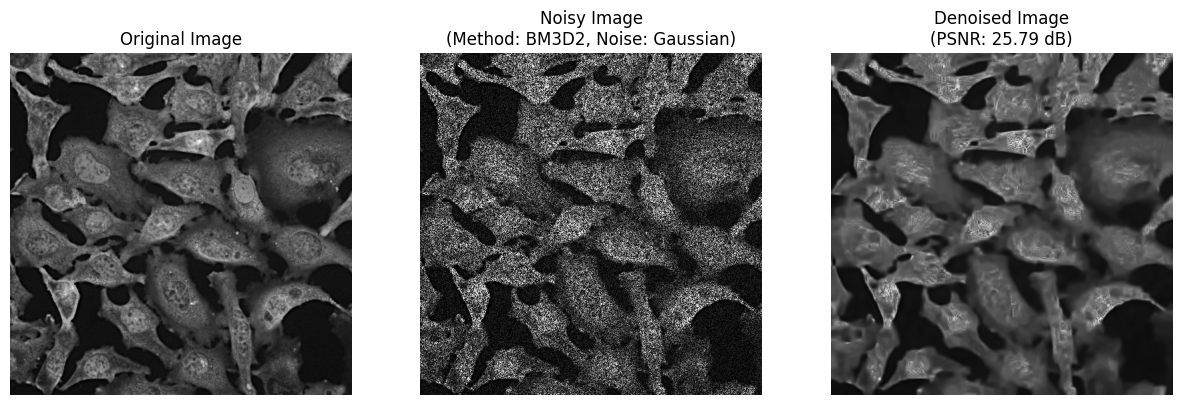

In [28]:

# Define an evaluation function for BM3D
def evaluate_bm3d_denoising(noisy_image,sigma_psd):
    denoised_image = bm3d.bm3d(noisy_image, sigma_psd=sigma_psd)
    psnr_value = helper_func.calculate_psnr(denoised_image, image)
    return psnr_value

# Define ranges for the hyperparameters
sigma_psds = [0.25]

best_psnr = -np.inf
best_params = None

# Write PSNR values to a CSV file
with open('Results/numbers/bm3d_psnr_results.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(["Patch Size", "Stride", "Threshold", "Similarity Threshold", "PSNR"])
    
    # Perform grid search over all combinations
    for sigma_psd in sigma_psds:
        psnr_value = evaluate_bm3d_denoising(noisy_image,sigma_psd=sigma_psd)
        print(sigma_psd)
        # Write the current configuration and PSNR to the file
        csvwriter.writerow([sigma_psd])
        
        # Update the best PSNR and parameters
        if psnr_value > best_psnr:
            best_psnr = psnr_value
            best_params = sigma_psd
        print(psnr_value)
# Output the best PSNR and parameters
print(f"Best PSNR: {best_psnr:.2f} dB")

# Use the best parameters to denoise the image
sigma_psd = best_params
method_name = "BM3D2"
noise_type = "Gaussian"

# Apply BM3D with the best parameters
denoised_bm3d = bm3d.bm3d(noisy_image, sigma_psd=sigma_psd)

# Plot the images
helper_func.plot_images(original=image, noisy=noisy_image, denoised_image=denoised_bm3d, method_name=method_name, noise_type=noise_type)


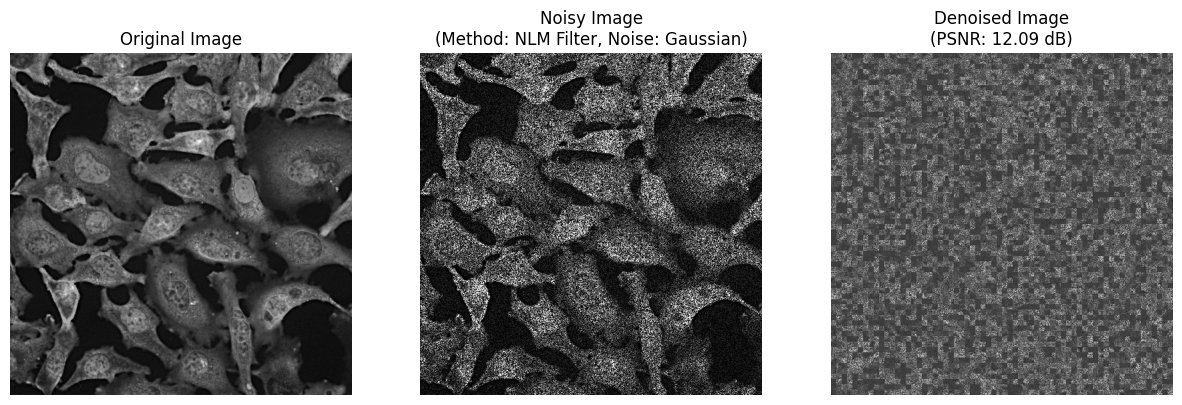

In [15]:
denoised_disctionary = denoiser.denoise_with_dictionary_learning(patch_size=8, n_components=250, alpha=1)
# Plot the images
helper_func.plot_images(original=image, noisy=noisy_image, denoised_image=denoised_disctionary, method_name=method_name, noise_type=noise_type)

In [42]:
from PIL import Image
import numpy as np


def anisotropic_diffusion(image, num_iterations=10, k=5, delta_t=1):
    """
    Performs anisotropic diffusion denoising on an image.

    Args:
        image: The input image as a NumPy array.
        num_iterations: Number of iterations for the diffusion process (default: 10).
        k: Constant controlling the sensitivity to gradients (default: 5).
        delta_t: Time step for the diffusion process (default: 1).

    Returns:
        The denoised image as a NumPy array.
    """

    # Pad the image with a single pixel reflection at the borders
    padded_image = np.pad(image, pad_width=1, mode='reflect')

    # Calculate image dimensions after padding
    image_height, image_width = image.shape

    for _ in range(num_iterations):
        # Calculate gradients within the valid image region (avoid padded pixels)
        dx = padded_image[1:image_height + 1, 1:image_width + 1] - padded_image[1:image_height + 1, :image_width]
        dy = padded_image[1:image_height + 1, 1:image_width + 1] - padded_image[:image_height, 1:image_width + 1]

        # Calculate absolute gradients and diffusion coefficients
        abs_dx = np.abs(dx)
        abs_dy = np.abs(dy)
        c_x = np.exp(-(abs_dx / k) ** 2)
        c_y = np.exp(-(abs_dy / k) ** 2)

        # Update image within the valid region
        image[1:, :-1] += delta_t * (c_x[:-1, :] * dx[:-1, :] + c_y[:-1, :] * (padded_image[2:image_height + 2, 1:image_width + 1] - padded_image[1:image_height + 1, 1:image_width + 1]))
        image[:-1, 1:] += delta_t * (c_x[:, :-1] * (padded_image[1:image_height + 1, 2:image_width + 2] - padded_image[1:image_height + 1, 1:image_width + 1]) + c_y[:, :-1] * dy[:, :-1])
        return np.clip(image, 0, 1)


# Apply anisotropic diffusion
denoised_image = anisotropic_diffusion(image)

# Save the denoised image using PIL
denoised_image_pil = Image.fromarray(denoised_image)
denoised_image_pil.save('denoised_image.jpg')

ValueError: operands could not be broadcast together with shapes (511,512) (512,512) 